In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#EvaluationsTrialSeedResults.txt
#EvaluationsTimeSeedResults.txt
#TimingTrialSeedResults.txt
#TimingTimeSeedResults.txt
df = pd.read_csv("EvaluationsTrialSeedResults.txt", sep=" ", header=None, names=["Experiment", "Trial", "Evaluations", "m", "e", "Best Fitness", "Time"])
#df

In [515]:
#df = df.drop(columns=['Trial'])
average = df.groupby(['Experiment','Evaluations']).mean()
display(average)

Trial      m    e  Best Fitness  Time
Experiment Evaluations                                       
1          0              3.0  100.0  0.9     5741949.2   0.0
           500            3.0  100.0  0.9     5664042.4  16.2
           1000           3.0  100.0  0.9     5660370.4  32.2
           1500           3.0  100.0  0.9     5647907.6  48.2
           2000           3.0  100.0  0.9     5635196.0  63.8
...                       ...    ...  ...           ...   ...
6          8000           3.0   10.0  0.1     5640955.6  25.0
           8500           3.0   10.0  0.1     5638506.8  26.2
           9000           3.0   10.0  0.1     5638506.8  28.0
           9500           3.0   10.0  0.1     5638506.8  29.6
           10000          3.0   10.0  0.1     5638168.8  31.0

[126 rows x 5 columns]

In [516]:
averageFitness = average.pivot_table(values=['Best Fitness'], index=['Evaluations'], columns=['Experiment', 'm', 'e'])
display(averageFitness)

Best Fitness                                              \
Experiment             1          2          3          4          5   
m                  100.0      100.0      10.0       10.0       100.0   
e                    0.9        0.5        0.9        0.5        0.1   
Evaluations                                                            
0              5741949.2  5741949.2  5814192.4  5814192.4  5741949.2   
500            5664042.4  5664042.4  5691615.6  5691615.6  5661565.2   
1000           5660370.4  5660370.4  5673392.4  5673392.4  5656701.2   
1500           5647907.6  5647907.6  5670918.4  5670918.4  5655348.0   
2000           5635196.0  5635196.0  5670418.0  5670418.0  5646412.8   
2500           5635196.0  5635196.0  5666662.4  5666662.4  5646412.8   
3000           5624345.2  5624345.2  5665913.2  5665913.2  5624179.6   
3500           5624345.2  5624345.2  5665913.2  5665913.2  5620526.8   
4000           5622472.0  5622472.0  5664792.8  5664792.8  5620526.8   
4500           5619260.0  5619260.0  5664792.8  5664792.8  5619560.0   
5000           5619260.0  5619260.0  5664042.4  5664042.4  5618589.6   
5500           5617787.6  5617787.6  5664042.4  5664042.4  5618589.6   
6000           5617787.6  5617787.6  5664042.4  5664042.4  5618072.0   
6500           5617787.6  5617787.6  5664042.4  5664042.4  5611347.2   
7000           5617787.6  5617787.6  5664042.4  5664042.4  5608443.6   
7500           5617787.6  5617787.6  5664042.4  5664042.4  5608443.6   
8000           5617787.6  5617787.6  5663968.4  5663968.4  5603851.6   
8500           5617787.6  5617787.6  5660378.0  5660378.0  5603851.6   
9000           5617787.6  5617787.6  5660378.0  5660378.0  5603529.2   
9500           5617787.6  5617787.6  5660378.0  5660378.0  5603068.4   
10000          5614864.4  5614864.4  5660370.4  5660370.4  5596954.4   

                        
Experiment           6  
m                10.0   
e                  0.1  
Evaluations             
0            5814192.4  
500          5691615.6  
1000         5676409.2  
1500         5672459.2  
2000         5671958.8  
2500         5671958.8  
3000         5661283.2  
3500         5653036.0  
4000         5647900.8  
4500         5641302.4  
5000         5641302.4  
5500         5641302.4  
6000         5641302.4  
6500         5640955.6  
7000         5640955.6  
7500         5640955.6  
8000         5640955.6  
8500         5638506.8  
9000         5638506.8  
9500         5638506.8  
10000        5638168.8

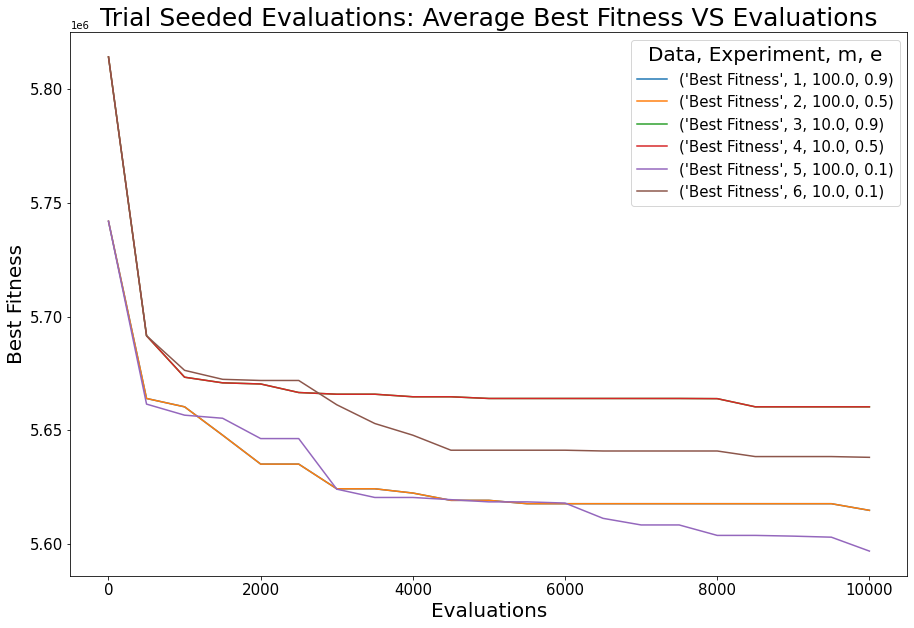

In [517]:
#averageFitness.plot(xlabel="Evaluations", ylabel="Best Fitness", figsize=(15, 10))
plt.figure(figsize=(15,10))
plt.plot(averageFitness)
#plt.title('Time Seeded Evaluations: Average Best Fitness VS Evaluations', fontsize=25)
plt.title('Trial Seeded Evaluations: Average Best Fitness VS Evaluations', fontsize=25)
plt.legend(averageFitness, title='Data, Experiment, m, e', title_fontsize=20, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Evaluations', fontsize=20)
plt.ylabel('Best Fitness', fontsize=20)
plt.show()

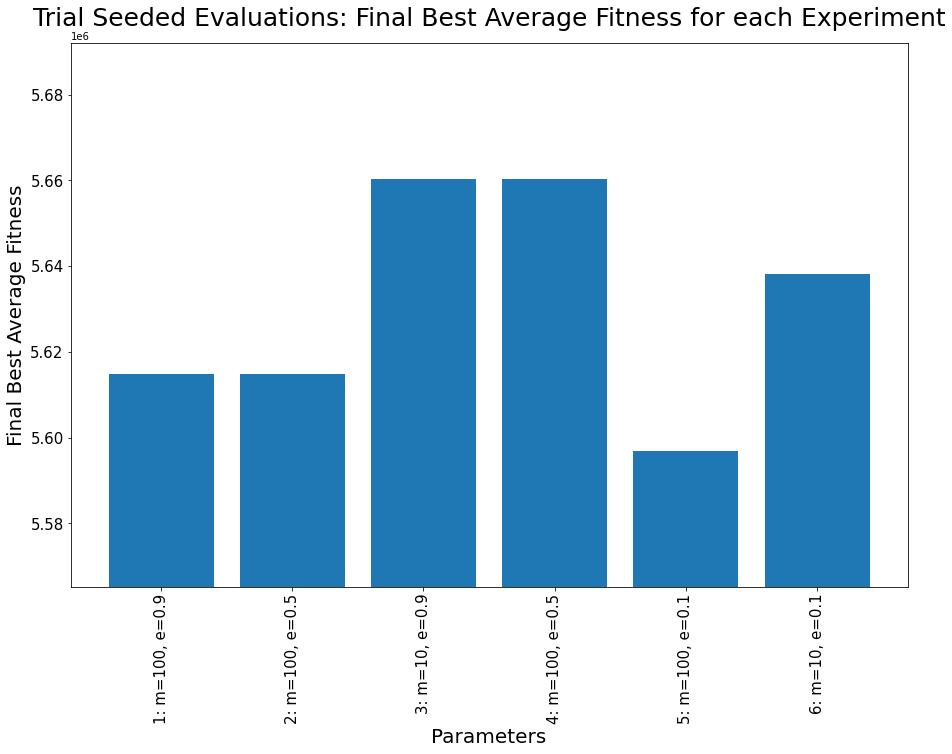

In [518]:
#averageFitness = df.loc[:, df.columns.isin(['Experiments', 'Best Fitness'])]
#averageFitness = averageFitness.reset_index()#.loc[:, averageFitness.columns.isin(['Experiments', 'Best Fitness'])]
averageBestFitness = df.loc[df['Evaluations'] == 10000]
averageBestFitness = averageBestFitness.groupby(['Experiment','Evaluations']).mean()
averageBestFitness = averageBestFitness.reset_index()
#display(averageBestFitness)
bestFitnessesList = [averageBestFitness[averageBestFitness['Experiment'].isin([x])]['Best Fitness'].tolist() for x in range(1,7)]
#print(bestFitnessesList)
bestFitnesses = []
for x in range(6):
    bestFitnesses.append(bestFitnessesList[x][0])
#print(bestFitnesses)
parameters = ['1: m=100, e=0.9', '2: m=100, e=0.5', '3: m=10, e=0.9', '4: m=100, e=0.5', '5: m=100, e=0.1', '6: m=10, e=0.1']
low = min(bestFitnesses)
high = max(bestFitnesses)
plt.figure(figsize=(15,10))
plt.bar(parameters, bestFitnesses)
plt.ylim(low-0.5*(high-low), high+0.5*(high-low))
#plt.title('Time Seeded Evaluations: Final Best Average Fitness for each Experiment', fontsize=25)
plt.title('Trial Seeded Evaluations: Final Best Average Fitness for each Experiment', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Parameters', fontsize=20)
plt.ylabel('Final Best Average Fitness', fontsize=20)
plt.show()

In [519]:
dft = pd.read_csv("TimingTrialSeedResults.txt", sep=" ", header=None, names=["Experiment", "Trial", "Evaluations", "m", "e", "Best Fitness", "Time"])
dft = dft.drop(columns=['Trial'])
averaget = dft.groupby(['Experiment','Time']).mean()
display(averaget)


Evaluations      m    e  Best Fitness
Experiment Time                                       
1          0             0.0  100.0  0.9     5741949.2
           10          306.4  100.0  0.9     5665913.2
           20          641.8  100.0  0.9     5664042.4
           30          975.8  100.0  0.9     5660378.0
           40         1302.6  100.0  0.9     5647907.6
...                      ...    ...  ...           ...
6          260       85981.6   10.0  0.1     5597882.4
           270       89264.2   10.0  0.1     5591757.6
           280       92523.8   10.0  0.1     5589048.8
           290       95843.2   10.0  0.1     5589048.8
           300       99169.4   10.0  0.1     5589048.8

[186 rows x 4 columns]

In [520]:
averagetFitness = averaget.pivot_table(values=['Best Fitness'], index=['Time'], columns=['Experiment', 'm', 'e'])
display(averagetFitness)

Best Fitness                                                       
Experiment            1          2          3          4          5          6
m                 100.0      100.0      10.0       10.0       100.0      10.0 
e                   0.9        0.5        0.9        0.5        0.1        0.1
Time                                                                          
0             5741949.2  5741949.2  5814192.4  5814192.4  5741949.2  5814192.4
10            5665913.2  5665913.2  5666662.4  5665913.2  5663436.0  5653036.0
20            5664042.4  5664042.4  5664042.4  5664042.4  5661565.2  5640955.6
30            5660378.0  5660378.0  5662745.2  5660370.4  5656708.8  5638168.8
40            5647907.6  5647907.6  5647907.6  5647907.6  5655348.0  5638168.8
50            5646262.4  5646262.4  5636841.2  5635196.0  5649304.8  5636624.0
60            5635196.0  5635196.0  5635196.0  5635196.0  5646412.8  5633550.8
70            5635196.0  5635196.0  5635196.0  5635196.0  5646412.8  5632922.4
80            5632448.8  5632448.8  5624345.2  5624345.2  5635131.2  5632922.4
90            5624345.2  5624345.2  5624345.2  5624345.2  5624179.6  5626267.2
100           5624345.2  5624345.2  5624345.2  5624345.2  5622897.2  5623678.0
110           5624345.2  5624345.2  5624345.2  5624345.2  5620526.8  5623678.0
120           5622472.0  5622472.0  5624345.2  5620946.8  5620526.8  5623582.0
130           5619622.8  5622472.0  5622472.0  5618097.6  5620526.8  5623582.0
140           5619260.0  5619260.0  5622472.0  5618097.6  5618816.0  5623582.0
150           5619260.0  5619260.0  5622109.2  5618097.6  5618816.0  5623582.0
160           5617787.6  5617787.6  5622109.2  5617787.6  5618589.6  5620598.8
170           5617787.6  5617787.6  5619260.0  5617787.6  5618589.6  5620359.6
180           5617787.6  5617787.6  5617787.6  5617787.6  5618589.6  5620359.6
190           5617787.6  5617787.6  5617787.6  5617787.6  5618072.0  5618408.0
200           5617787.6  5617787.6  5617787.6  5617787.6  5611347.2  5618408.0
210           5617787.6  5617787.6  5617787.6  5617787.6  5611347.2  5618408.0
220           5617787.6  5617787.6  5617787.6  5617787.6  5608443.6  5606859.2
230           5617787.6  5617787.6  5617787.6  5617787.6  5608443.6  5606314.8
240           5617787.6  5617787.6  5617787.6  5617787.6  5608433.6  5606314.8
250           5617787.6  5617787.6  5617787.6  5617787.6  5603851.6  5598160.0
260           5617787.6  5617787.6  5617787.6  5617787.6  5603851.6  5597882.4
270           5617787.6  5617787.6  5617787.6  5617787.6  5603529.2  5591757.6
280           5617787.6  5617787.6  5617787.6  5617787.6  5603068.4  5589048.8
290           5620486.0  5614864.4  5617787.6  5614864.4  5603068.4  5589048.8
300           5614864.4  5614864.4  5617787.6  5614864.4  5596954.4  5589048.8

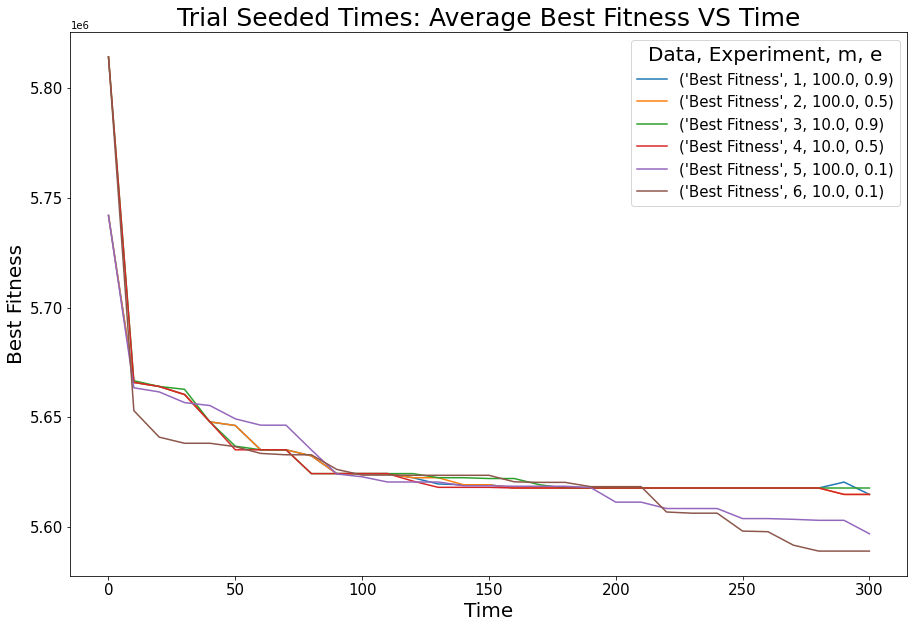

In [521]:
plt.figure(figsize=(15,10))
plt.plot(averagetFitness)
#plt.title('Time Seeded Times: Average Best Fitness VS Time', fontsize=25)
plt.title('Trial Seeded Times: Average Best Fitness VS Time', fontsize=25)
plt.legend(averagetFitness, title='Data, Experiment, m, e', title_fontsize=20, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Best Fitness', fontsize=20)
plt.show()

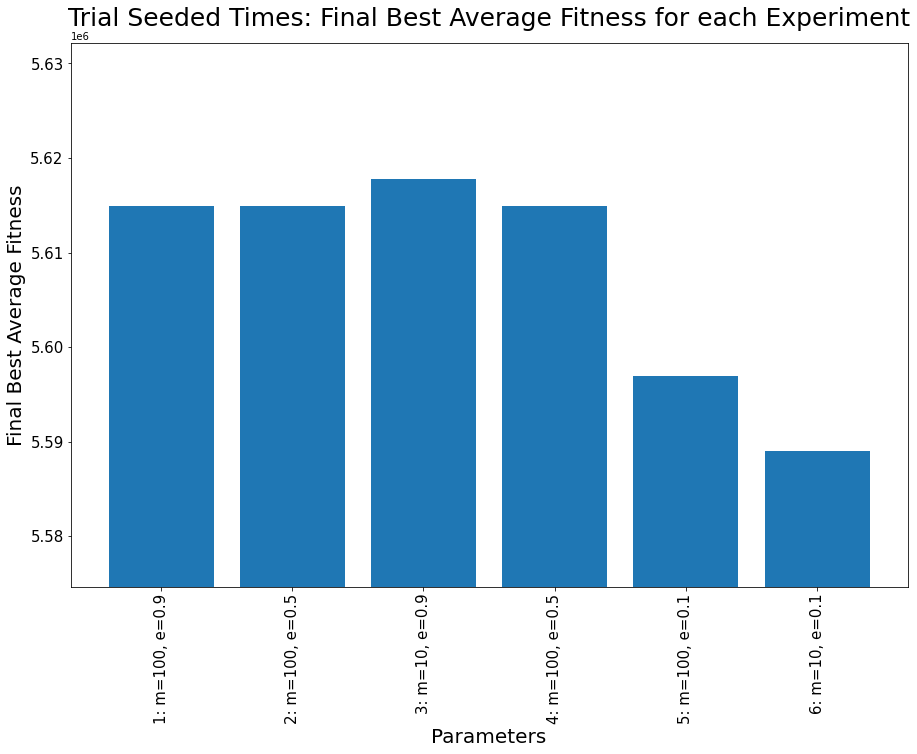

In [522]:
averagetBestFitness = dft.loc[dft['Time'] == 300]
averagetBestFitness = averagetBestFitness.groupby(['Experiment','Time']).mean()
averagetBestFitness = averagetBestFitness.reset_index()
#display(averagetBestFitness)
besttFitnessesList = [averagetBestFitness[averagetBestFitness['Experiment'].isin([x])]['Best Fitness'].tolist() for x in range(1,7)]
#print(besttFitnessesList)
besttFitnesses = []
for x in range(6):
    besttFitnesses.append(besttFitnessesList[x][0])
#print(bestFitnesses)
low = min(besttFitnesses)
high = max(besttFitnesses)
plt.figure(figsize=(15,10))
plt.bar(parameters, besttFitnesses)
plt.ylim(low-0.5*(high-low), (high+0.5*(high-low)))
#plt.title('Time Seeded Times: Final Best Average Fitness for each Experiment', fontsize=25)
plt.title('Trial Seeded Times: Final Best Average Fitness for each Experiment', fontsize=25)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Parameters', fontsize=20)
plt.ylabel('Final Best Average Fitness', fontsize=20)
plt.show()

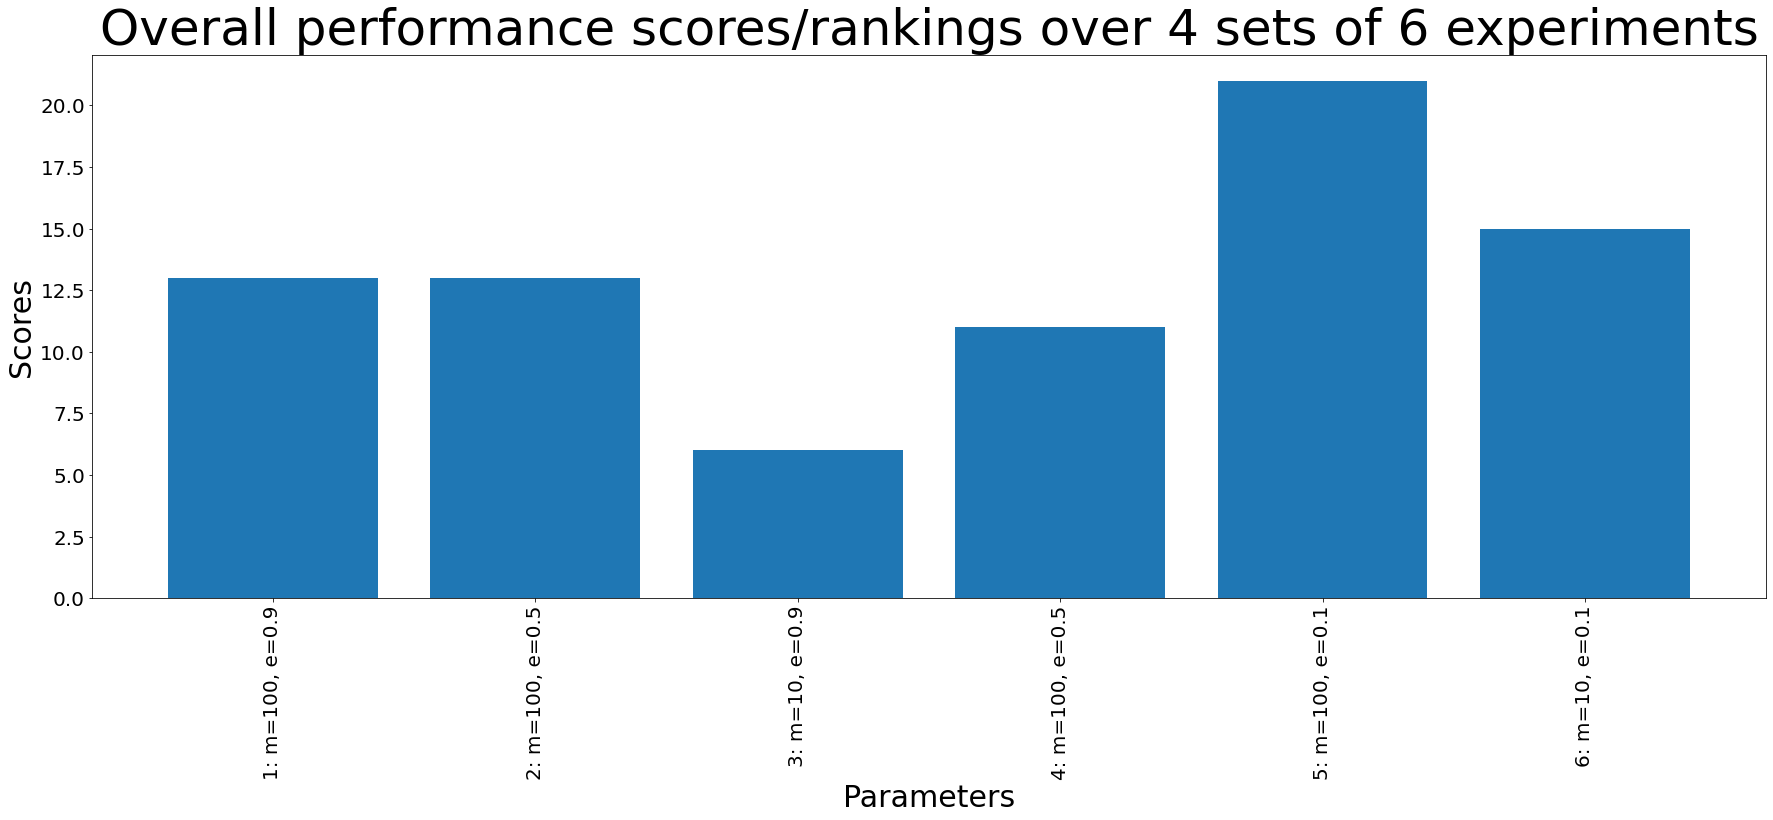

In [525]:
parameters = ['1: m=100, e=0.9', '2: m=100, e=0.5', '3: m=10, e=0.9', '4: m=100, e=0.5', '5: m=100, e=0.1', '6: m=10, e=0.1']
# 1 6 4 1 2 13
# 2 5 4 3 1 13
# 3 1 1 2 2 6
# 4 3 1 5 2 11
# 5 4 6 6 5 21
# 6 2 3 4 6 15
scores = [13,13,6,11,21,15]
plt.figure(figsize=(30,10))
plt.bar(parameters, scores)
plt.title('Overall performance scores/rankings over 4 sets of 6 experiments', fontsize=50)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Parameters', fontsize=30)
plt.ylabel('Scores', fontsize=30)
plt.show()